In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l2,l1

In [2]:
#dense = couche entiérement connecté, fait sur la couche de sortie
# load _ data retourne variables x,y de test et de train
#database s'appele mnist 

(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(np.shape(x_train),np.shape(y_train))
print(np.shape(x_test),np.shape(y_test))

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
#x(60000 nb images d'apprentissage 28,28 taille d'image)et y(60000,) nb d'étiquette correspondant
#1000 nb image de test 
#profondeur par défaut 1

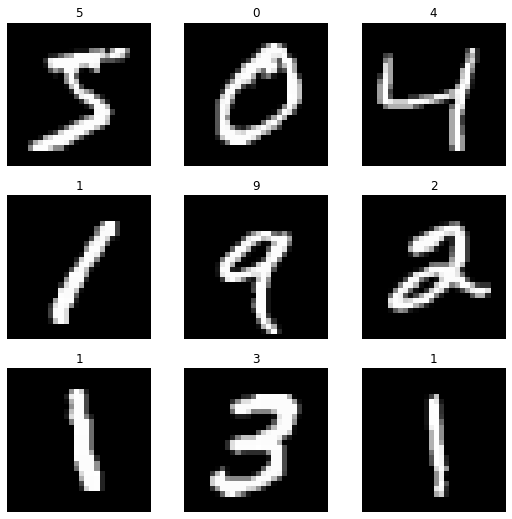

In [3]:
#classifier la BD
#2.visualiser qlq exp d'app
plt.rcParams["figure.figsize"]=[9.,9.] #taille de l'image
plt.rcParams["figure.autolayout"]=False

fig,axs = plt.subplots(nrows=3, ncols=3)
axs = axs.flatten()
for ax,j in zip(axs,range(9)):
  ax.axis("off")
  ax.imshow(x_train[j], cmap="gray")
  ax.set_title(str(y_train[j]))



plt.show()

In [4]:
#3. préparer les données en pixels (applatissement + normalisation)
x_train_v=np.reshape(x_train, [60000,784])/255  # la val doit etre entre 0 et 255 dnc pour avoir normalisation on divise sur 60000 images ayant 28*28=784pixels sur 255 
x_test_v=np.reshape(x_test, [10000,784])/255

print(np.shape(x_train_v))
print(np.shape(x_test_v))

(60000, 784)
(10000, 784)


In [5]:
#4.catégoriser la cible (one hot encoding)
from tensorflow.keras.utils import to_categorical
y_train_c=to_categorical(y_train)
y_test_c=to_categorical(y_test)

print("avant", np.shape(y_train), "après", np.shape(y_train_c))
print("avant", y_train[10])
print("avant", y_train_c[10])

avant (60000,) après (60000, 10)
avant 3
avant [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [6]:
#5.1développer un modèle RN avec 0 couche caché
#les parametres de modeles sont omégas wi et les biais bi
def perceptron_monocouche():
  inp=Input(shape=(784,))
  outp=Dense(10,activation="softmax") (inp) # (dense pour les paramètres de modèles et inp entré de cette couche n)
  model = Model (inp,outp)
  model.summary()
  return model

In [7]:
#5.2 avec multicouches
def perceptron_multicouche():
  inp=Input(shape=(784,)) #784 pixel avec , étiquette 
  c1=Dense(200,activation="sigmoid") (inp) 
  c2=Dense(100,activation="sigmoid") (c1) 
  c3=Dense(60,activation="sigmoid") (c2) 
  c4=Dense(30,activation="sigmoid") (c3) 
  outp=Dense(10,activation="softmax") (c4) 
  model = Model (inp,outp)
  model.summary()
  return model

  #ns avons utiliser sigmoide dans c1 à c4 psk ns sommes pas besoin de comparer ci par rapport à une autre cj

In [8]:
#5.2 avec multicouches
def perceptron_multicouche_relu():
  inp=Input(shape=(784,)) #784 pixel avec , étiquette 
  c1=Dense(200,activation="relu") (inp) #les valeurs de neurons pour chaque couche est donné dans l'exercice
  c2=Dense(100,activation="relu") (c1) 
  c3=Dense(60,activation="relu") (c2) 
  c4=Dense(30,activation="relu") (c3) 
  outp=Dense(10,activation="softmax") (c4) 
  model = Model (inp,outp)
  model.summary()
  return model

In [9]:
#6.model d'entrainement
#a.fct cout
fc="categorical_crossentropy" #psk on a plusieurs classes si on a que 2 on va utiliser binary_crossentropy

#fct d'optimisation SGD
optim=tf.keras.optimizers.SGD(learning_rate=0.001)


In [ ]:
from tensorflow.python import metrics
#c. apprentissage
modelA=perceptron_monocouche()
modelA.compile(loss=fc, optimizer=optim, metrics=["accuracy"])
# 1 b 1 ayt3tl, kolchy ayconsommé mémoire, batch c à d par lots pour mélanger toute les classes vu que 
#fit pour apprendre 
histA=modelA.fit(x_train_v,y_train_c, validation_data=(x_test_v,y_test_c), epochs=100, batch_size=100, shuffle=True)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 2.1149 - accuracy: 0.2837 - val_loss: 1.8597 - val_accuracy: 0.4579
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 1.6735 - accuracy: 0.6163 - val_loss: 1.5026 - val_accuracy: 0.7088
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 1.3903 - accuracy: 0.7373 - val_loss: 1.2698 - val_accuracy: 0.7690
Epoch 4/100
600/600 [===

In [ ]:
#c. apprentissage
modelB=perceptron_multicouche()
modelB.compile(loss=fc, optimizer=optim, metrics=["accuracy"])
histB=modelB.fit(x_train_v,y_train_c, validation_data=(x_test_v,y_test_c), epochs=100, batch_size=100, shuffle=True)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_13 (Dense)            (None, 200)               157000    
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 dense_15 (Dense)            (None, 60)                6060      
                                                                 
 dense_16 (Dense)            (None, 30)                1830      
                                                                 
 dense_17 (Dense)            (None, 10)                310       
                                                                 
Total params: 185,300
Trainable params: 185,300
Non-trainab

In [ ]:
#7.visualiser les couches
plt.rcParams["figure.figsize"]=[6., 5.]
plt.rcParams.update()
plt.show()

In [ ]:
#8.evaluer le modèles sur ensemble de test
test_loss_modelB, test_acc_modelB = modelB.evaluate(x_test_v,  y_test_c, verbose=2)


313/313 - 1s - loss: 2.2980 - accuracy: 0.1135 - 758ms/epoch - 2ms/step


In [ ]:
print(test_acc_modelB)
print(test_loss_modelB)

0.11349999904632568
2.298011064529419


In [ ]:
pred_B= modelB.predict(x_test_v) 
pred_B= np.argmax(pred_B, axis = 1)[:5] 
label_B = np.argmax(y_test_c,axis = 1)[:5] 

print(pred_B) 
print(label_B)

313/313 [==============================] - 1s 3ms/step
[1 1 1 1 1]
[7 2 1 0 4]


**Modèle d' Base**

In [10]:
#c. apprentissage
modelC=perceptron_multicouche_relu()
modelC.compile(loss=fc, optimizer=optim, metrics=["accuracy"])
histC=modelC.fit(x_train_v,y_train_c, validation_data=(x_test_v,y_test_c), epochs=100, batch_size=100, shuffle=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 60)                6060      
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
Total params: 185,300
Trainable params: 185,300
Non-trainable

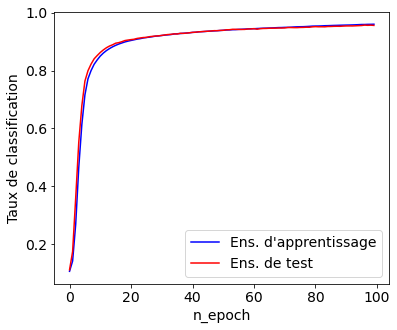

In [11]:
#7.visualiser les erreurs
plt.rcParams["figure.figsize"] = [6., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(histC.history["accuracy"],c='b',label="Ens. d'apprentissage")
plt.plot(histC.history["val_accuracy"],c='r',label="Ens. de test")
plt.xlabel("n_epoch")
plt.ylabel("Taux de classification")
plt.legend()
plt.show()


313/313 [==============================] - 1s 2ms/step


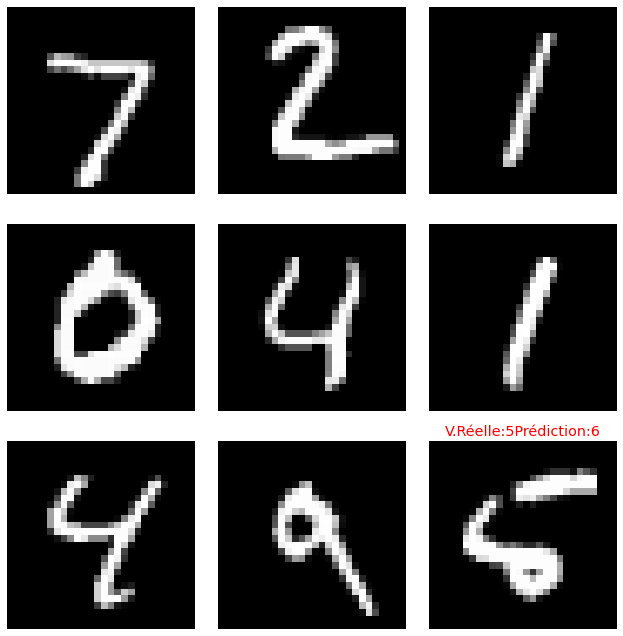

In [12]:
#8. Evaluer vos modèle sur l’ensemble de test

plt.rcParams["figure.figsize"] = [9., 9.]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(nrows=3, ncols=3)
axs = axs.flatten()
y_pred=modelC.predict(x_test_v)
color="red"
for ax,j in zip(axs, range(9)):
  ax.axis("off")
  ax.imshow(x_test[j], cmap='gray')
if (y_test[j]==np.argmax(y_pred[j])):
  color="green"
else:
  color="red"

ax.set_title("V.Réelle:"+str(y_test[j])+"Prédiction:"+str(np.argmax(y_pred[j])),c=color)
plt.show()

1/1 [==============================] - 0s 20ms/step


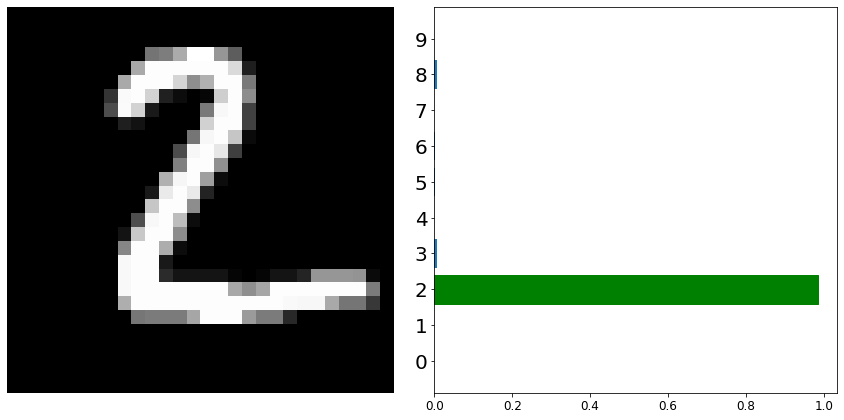

In [13]:
indice_exemple=1
image_test1=x_test_v[indice_exemple]
predictionProba =modelC.predict(image_test1.reshape(1,-1))
predictionClass=np.argmax(predictionProba)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(x_test[indice_exemple], cmap='gray')
ax1.axis("off")
y_pos = np.arange(10)
barlist=ax2.barh(y_pos,predictionProba[0])
if(predictionClass==y_test[indice_exemple]):
  barlist[int(predictionClass)].set_color('g')
else:
  barlist[int(predictionClass)].set_color('r')
plt.yticks(y_pos, y_pos, fontsize=20)
plt.show()

In [ ]:
#8.evaluer le modèles sur ensemble de test
test_loss_modelC, test_acc_modelC = modelC.evaluate(x_test_v,  y_test_c, verbose=2)


313/313 - 1s - loss: 0.1528 - accuracy: 0.9561 - 874ms/epoch - 3ms/step


In [ ]:
pred_C= modelC.predict(x_test_v) 
pred_C= np.argmax(pred_C, axis = 1)[:50] 
label_C= np.argmax(y_test_c,axis = 1)[:50] 

print(pred_C) 
print(label_C)

313/313 [==============================] - 1s 2ms/step
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]


**1. Lasso**

In [15]:
def lasso_reg(lambd):
  inp=Input(shape=(784,)) #784 pixel avec , étiquette 
  c1=Dense(200, kernel_regularizer=l1(lambd),activation="relu") (inp) #les valeurs de neurons pour chaque couche est donné dans l'exercice
  c2=Dense(100, kernel_regularizer=l1(lambd),activation="relu") (c1) 
  c3=Dense(60, kernel_regularizer=l1(lambd),activation="relu") (c2) 
  c4=Dense(30, kernel_regularizer=l1(lambd),activation="relu") (c3) 
  outp=Dense(10,activation="softmax") (c4) 
  model = Model (inp,outp)
  model.summary()
  return model

In [61]:
optimAd=tf.keras.optimizers.Adam(learning_rate=0.01)
lasso=lasso_reg(lambd=0.001)
lasso.compile(loss=fc, optimizer=optimAd,metrics=["accuracy"])
hist_lasso=lasso.fit(x_train_v,y_train_c, validation_data=(x_test_v,y_test_c), epochs=100, batch_size=100, shuffle=True)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_55 (Dense)            (None, 200)               157000    
                                                                 
 dense_56 (Dense)            (None, 100)               20100     
                                                                 
 dense_57 (Dense)            (None, 60)                6060      
                                                                 
 dense_58 (Dense)            (None, 30)                1830      
                                                                 
 dense_59 (Dense)            (None, 10)                310       
                                                                 
Total params: 185,300
Trainable params: 185,300
Non-traina

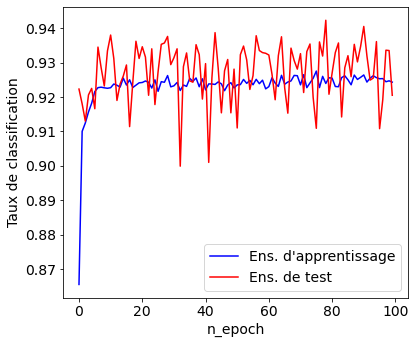

In [62]:
#7.visualiser les erreurs
plt.rcParams["figure.figsize"] = [6., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(hist_lasso.history["accuracy"],c='b',label="Ens. d'apprentissage")
plt.plot(hist_lasso.history["val_accuracy"],c='r',label="Ens. de test")
plt.xlabel("n_epoch")
plt.ylabel("Taux de classification")
plt.legend()
plt.show()


313/313 [==============================] - 1s 3ms/step


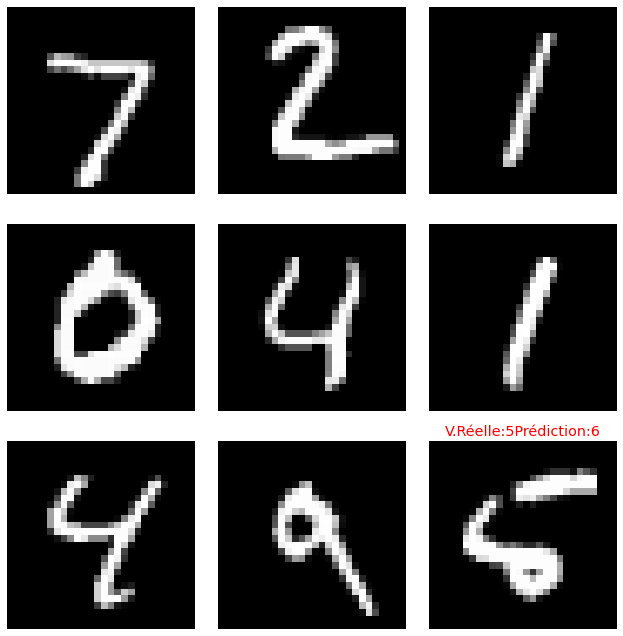

In [63]:
#8. Evaluer vos modèle sur l’ensemble de test

plt.rcParams["figure.figsize"] = [9., 9.]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(nrows=3, ncols=3)
axs = axs.flatten()
y_pred_lasso=lasso.predict(x_test_v)
color="red"
for ax,j in zip(axs, range(9)):
  ax.axis("off")
  ax.imshow(x_test[j], cmap='gray')
if (y_test[j]==np.argmax(y_pred_lasso[j])):
  color="green"
else:
  color="red"

ax.set_title("V.Réelle:"+str(y_test[j])+"Prédiction:"+str(np.argmax(y_pred_lasso[j])),c=color)
plt.show()

1/1 [==============================] - 0s 20ms/step


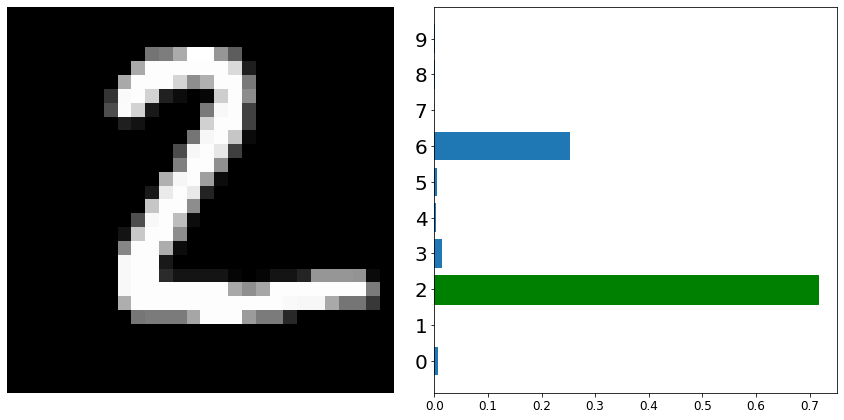

In [64]:
indice_exemple=1
image_test1=x_test_v[indice_exemple]
predictionProba =lasso.predict(image_test1.reshape(1,-1))
predictionClass=np.argmax(predictionProba)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(x_test[indice_exemple], cmap='gray')
ax1.axis("off")
y_pos = np.arange(10)
barlist=ax2.barh(y_pos,predictionProba[0])
if(predictionClass==y_test[indice_exemple]):
  barlist[int(predictionClass)].set_color('g')
else:
  barlist[int(predictionClass)].set_color('r')
plt.yticks(y_pos, y_pos, fontsize=20)
plt.show()

In [65]:
test_loss_lasso, test_acc_lasso = lasso.evaluate(x_test_v,  y_test_c, verbose=2)

313/313 - 1s - loss: 0.7668 - accuracy: 0.9205 - 1s/epoch - 3ms/step


In [66]:
pred_lasso= lasso.predict(x_test_v) 
pred_lasso = np.argmax(pred_lasso, axis = 1)[:20] 
label_lasso = np.argmax(y_test_c,axis = 1)[:20] 

print(pred_lasso) 
print(label_lasso)

313/313 [==============================] - 1s 2ms/step
[7 2 1 0 4 1 4 9 6 9 0 6 4 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


**2. Ridge**

In [20]:
def ridge_reg(lambd):
  inp=Input(shape=(784,)) #784 pixel avec , étiquette 
  c1=Dense(200, kernel_regularizer=l2(lambd),activation="relu") (inp) #les valeurs de neurons pour chaque couche est donné dans l'exercice
  c2=Dense(100, kernel_regularizer=l2(lambd),activation="relu") (c1) 
  c3=Dense(60, kernel_regularizer=l2(lambd),activation="relu") (c2) 
  c4=Dense(30, kernel_regularizer=l2(lambd),activation="relu") (c3) 
  outp=Dense(10,activation="softmax") (c4) 
  model = Model (inp,outp)
  model.summary()
  return model

In [41]:
ridge=ridge_reg(lambd=0.0001)
ridge.compile(loss=fc, optimizer=optimAd,metrics=["accuracy"])
hist_ridge=ridge.fit(x_train_v,y_train_c, validation_data=(x_test_v,y_test_c), epochs=100, batch_size=100, shuffle=True)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_45 (Dense)            (None, 200)               157000    
                                                                 
 dense_46 (Dense)            (None, 100)               20100     
                                                                 
 dense_47 (Dense)            (None, 60)                6060      
                                                                 
 dense_48 (Dense)            (None, 30)                1830      
                                                                 
 dense_49 (Dense)            (None, 10)                310       
                                                                 
Total params: 185,300
Trainable params: 185,300
Non-trainab

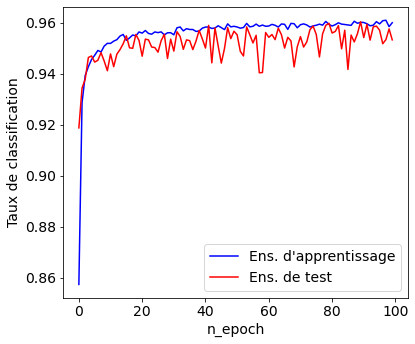

In [42]:
#7.visualiser les erreurs
plt.rcParams["figure.figsize"] = [6., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(hist_ridge.history["accuracy"],c='b',label="Ens. d'apprentissage")
plt.plot(hist_ridge.history["val_accuracy"],c='r',label="Ens. de test")
plt.xlabel("n_epoch")
plt.ylabel("Taux de classification")
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step


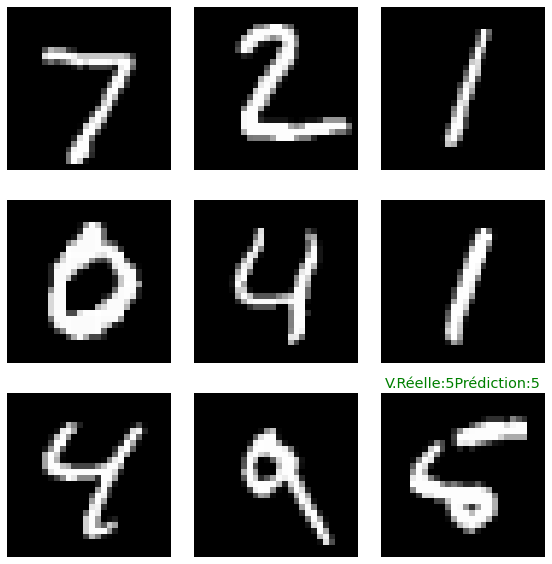

In [43]:
#8. Evaluer vos modèle sur l’ensemble de test

plt.rcParams["figure.figsize"] = [8., 8.]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(nrows=3, ncols=3)
axs = axs.flatten()
y_pred_ridge=ridge.predict(x_test_v)
color="red"
for ax,j in zip(axs, range(9)):
  ax.axis("off")
  ax.imshow(x_test[j], cmap='gray')
if (y_test[j]==np.argmax(y_pred_ridge[j])):
  color="green"
else:
  color="red"

ax.set_title("V.Réelle:"+str(y_test[j])+"Prédiction:"+str(np.argmax(y_pred_ridge[j])),c=color)
plt.show()

1/1 [==============================] - 0s 25ms/step


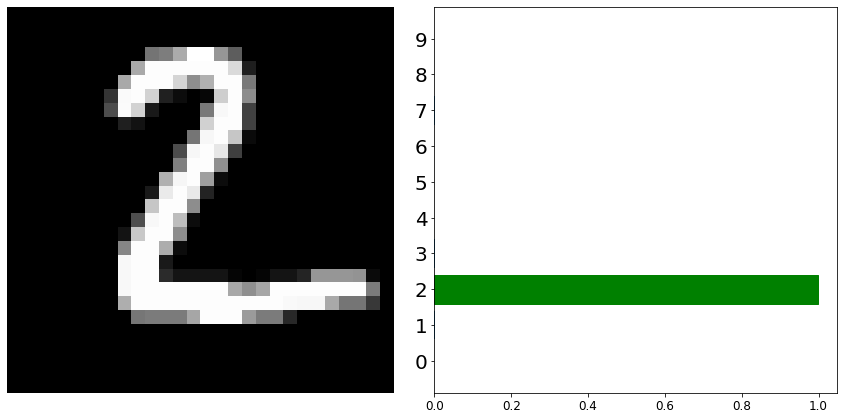

In [44]:
indice_exemple=1
image_test1=x_test_v[indice_exemple]
predictionProba =ridge.predict(image_test1.reshape(1,-1))
predictionClass=np.argmax(predictionProba)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(x_test[indice_exemple], cmap='gray')
ax1.axis("off")
y_pos = np.arange(10)
barlist=ax2.barh(y_pos,predictionProba[0])
if(predictionClass==y_test[indice_exemple]):
  barlist[int(predictionClass)].set_color('g')
else:
  barlist[int(predictionClass)].set_color('r')
plt.yticks(y_pos, y_pos, fontsize=20)
plt.show()

In [45]:
test_loss_ridge, test_acc_ridge= ridge.evaluate(x_test_v,  y_test_c, verbose=2)

313/313 - 1s - loss: 0.2349 - accuracy: 0.9532 - 1s/epoch - 3ms/step


In [47]:
pred_ridge= ridge.predict(x_test_v) 
pred_ridge= np.argmax(pred_ridge, axis = 1)[:20] 
label_ridge = np.argmax(y_test_c,axis = 1)[:20] 

print(pred_ridge) 
print(label_ridge)

313/313 [==============================] - 1s 4ms/step
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


**3. weight decay**

In [49]:
wd=ridge_reg(lambd=0.0001)
wd.compile(loss=fc, optimizer=optim,metrics=["accuracy"])
hist_wd=wd.fit(x_train_v,y_train_c, validation_data=(x_test_v,y_test_c), epochs=100, batch_size=100, shuffle=True)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_50 (Dense)            (None, 200)               157000    
                                                                 
 dense_51 (Dense)            (None, 100)               20100     
                                                                 
 dense_52 (Dense)            (None, 60)                6060      
                                                                 
 dense_53 (Dense)            (None, 30)                1830      
                                                                 
 dense_54 (Dense)            (None, 10)                310       
                                                                 
Total params: 185,300
Trainable params: 185,300
Non-traina

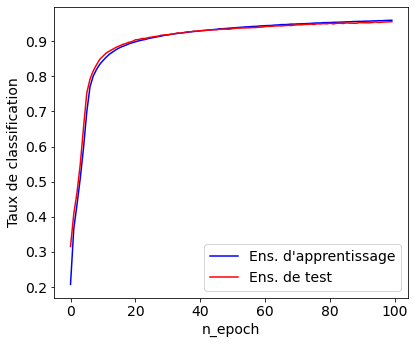

In [50]:
#7.visualiser les erreurs
plt.rcParams["figure.figsize"] = [6., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(hist_wd.history["accuracy"],c='b',label="Ens. d'apprentissage")
plt.plot(hist_wd.history["val_accuracy"],c='r',label="Ens. de test")
plt.xlabel("n_epoch")
plt.ylabel("Taux de classification")
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


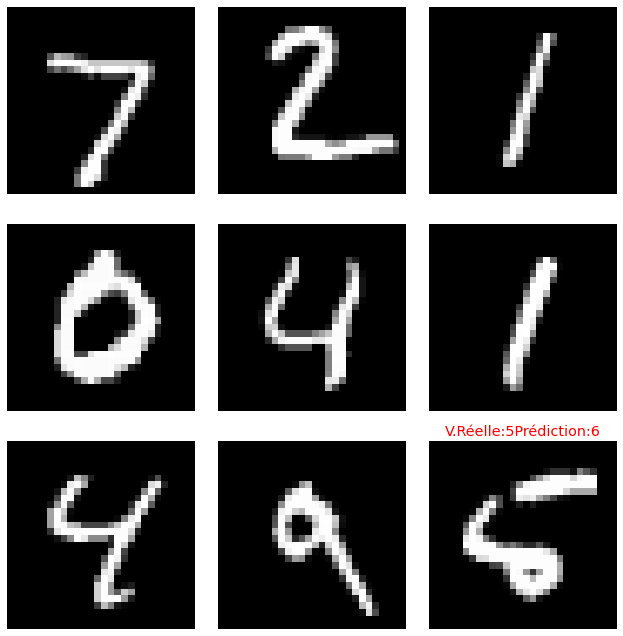

In [57]:
#8. Evaluer vos modèle sur l’ensemble de test

plt.rcParams["figure.figsize"] = [9., 9.]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(nrows=3, ncols=3)
axs = axs.flatten()
y_pred_wd=wd.predict(x_test_v)
color="red"
for ax,j in zip(axs, range(9)):
  ax.axis("off")
  ax.imshow(x_test[j], cmap='gray')
if (y_test[j]==np.argmax(y_pred_wd[j])):
  color="green"
else:
  color="red"

ax.set_title("V.Réelle:"+str(y_test[j])+"Prédiction:"+str(np.argmax(y_pred_wd[j])),c=color)
plt.show()

1/1 [==============================] - 0s 21ms/step


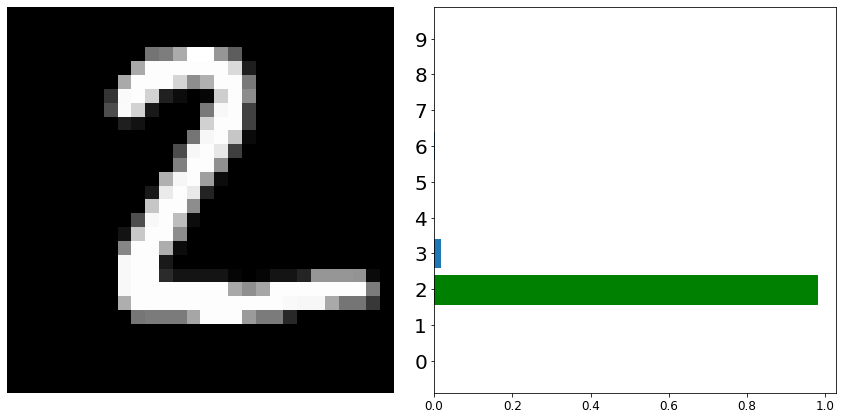

In [58]:
indice_exemple=1
image_test1=x_test_v[indice_exemple]
predictionProba =wd.predict(image_test1.reshape(1,-1))
predictionClass=np.argmax(predictionProba)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(x_test[indice_exemple], cmap='gray')
ax1.axis("off")
y_pos = np.arange(10)
barlist=ax2.barh(y_pos,predictionProba[0])
if(predictionClass==y_test[indice_exemple]):
  barlist[int(predictionClass)].set_color('g')
else:
  barlist[int(predictionClass)].set_color('r')
plt.yticks(y_pos, y_pos, fontsize=20)
plt.show()

In [59]:
test_loss_wd, test_acc_wd= wd.evaluate(x_test_v,  y_test_c, verbose=2)

313/313 - 1s - loss: 0.2060 - accuracy: 0.9560 - 971ms/epoch - 3ms/step


In [60]:
pred_wd= wd.predict(x_test_v) 
pred_wd= np.argmax(pred_wd, axis = 1)[:20] 
label_wd = np.argmax(y_test_c,axis = 1)[:20] 

print(pred_wd) 
print(label_wd)

313/313 [==============================] - 1s 3ms/step
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
